In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv(r"E:\ny_housing_project\data\NY-House-Dataset-Cleaned.csv")


In [82]:
df.head()

,BROKERTITLE,PRICE,BEDS,BATH,PROPERTYSQFT,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,STATUS,PROPERTY_TYPE,segment,BOROUGH,ZIP
0,douglas elliman,315000,2,2.000000,1400.0,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,unknown,condo,Normal,Manhattan,10022
1,serhant,195000000,7,10.000000,17545.0,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,unknown,condo,Luxury,Manhattan,10019
2,sowae corp,260000,4,2.000000,2015.0,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,unknown,house,Normal,Manhattan,10312
3,compass,69000,3,1.000000,445.0,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,unknown,condo,Outlier,Manhattan,10022
4,sotheby's,55000000,7,2.373861,14175.0,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,unknown,townhouse,Luxury,Manhattan,10065


In [83]:
df_normal = df[df['segment'] == 'Normal']
df_luxury = df[df['segment'] == 'Luxury']
df_Outlier  = df[df['segment'] == 'Outlier']

In [85]:
df_normal['BOROUGH'].value_counts()

BOROUGH
Manhattan        1784
Brooklyn          359
Queens            269
Bronx             120
Staten Island      52
Name: count, dtype: int64

In [86]:
df_normal

,BROKERTITLE,PRICE,BEDS,BATH,PROPERTYSQFT,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,STATUS,PROPERTY_TYPE,segment,BOROUGH,ZIP
0,douglas elliman,315000,2,2.000000,1400.0,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,unknown,condo,Normal,Manhattan,10022
2,sowae corp,260000,4,2.000000,2015.0,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,unknown,house,Normal,Manhattan,10312
7,pantiga inc,265000,1,1.000000,750.0,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089,unknown,co op,Normal,Bronx,10473
8,century 21 mk,440000,2,1.000000,978.0,"1350 Ocean Pkwy #5g, Brooklyn, NY 11230, USA",40.615738,-73.969694,unknown,co op,Normal,Brooklyn,11230
9,engel volkers americas,375000,2,1.000000,850.0,"800 Grand Concourse #2j, Bronx, NY 10451, USA",40.824870,-73.922983,unknown,co op,Normal,Bronx,10451
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,serhant,789000,3,2.373861,800.0,"109 Lafayette St RM 502, New York, NY 10013, USA",40.717926,-74.000594,unknown,condo,Normal,Manhattan,10013
3016,brown harris stevens,945000,2,2.000000,903.0,2351 Adam Clayton Powell Jr Blvd Apartment 614...,40.816711,-73.942050,unknown,condo,Normal,Manhattan,10030
3017,re/max,2999999,15,9.000000,3600.0,"2825 W 15th St, Brooklyn, NY 11224, USA",40.578450,-73.982739,unknown,multi family home,Normal,Manhattan,11224
3018,e corp,598125,2,1.000000,655.0,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752,unknown,condo,Normal,Queens,11373


# 1. Exploratory Data Analysis (EDA)

## 2.1. Univariate Analysis


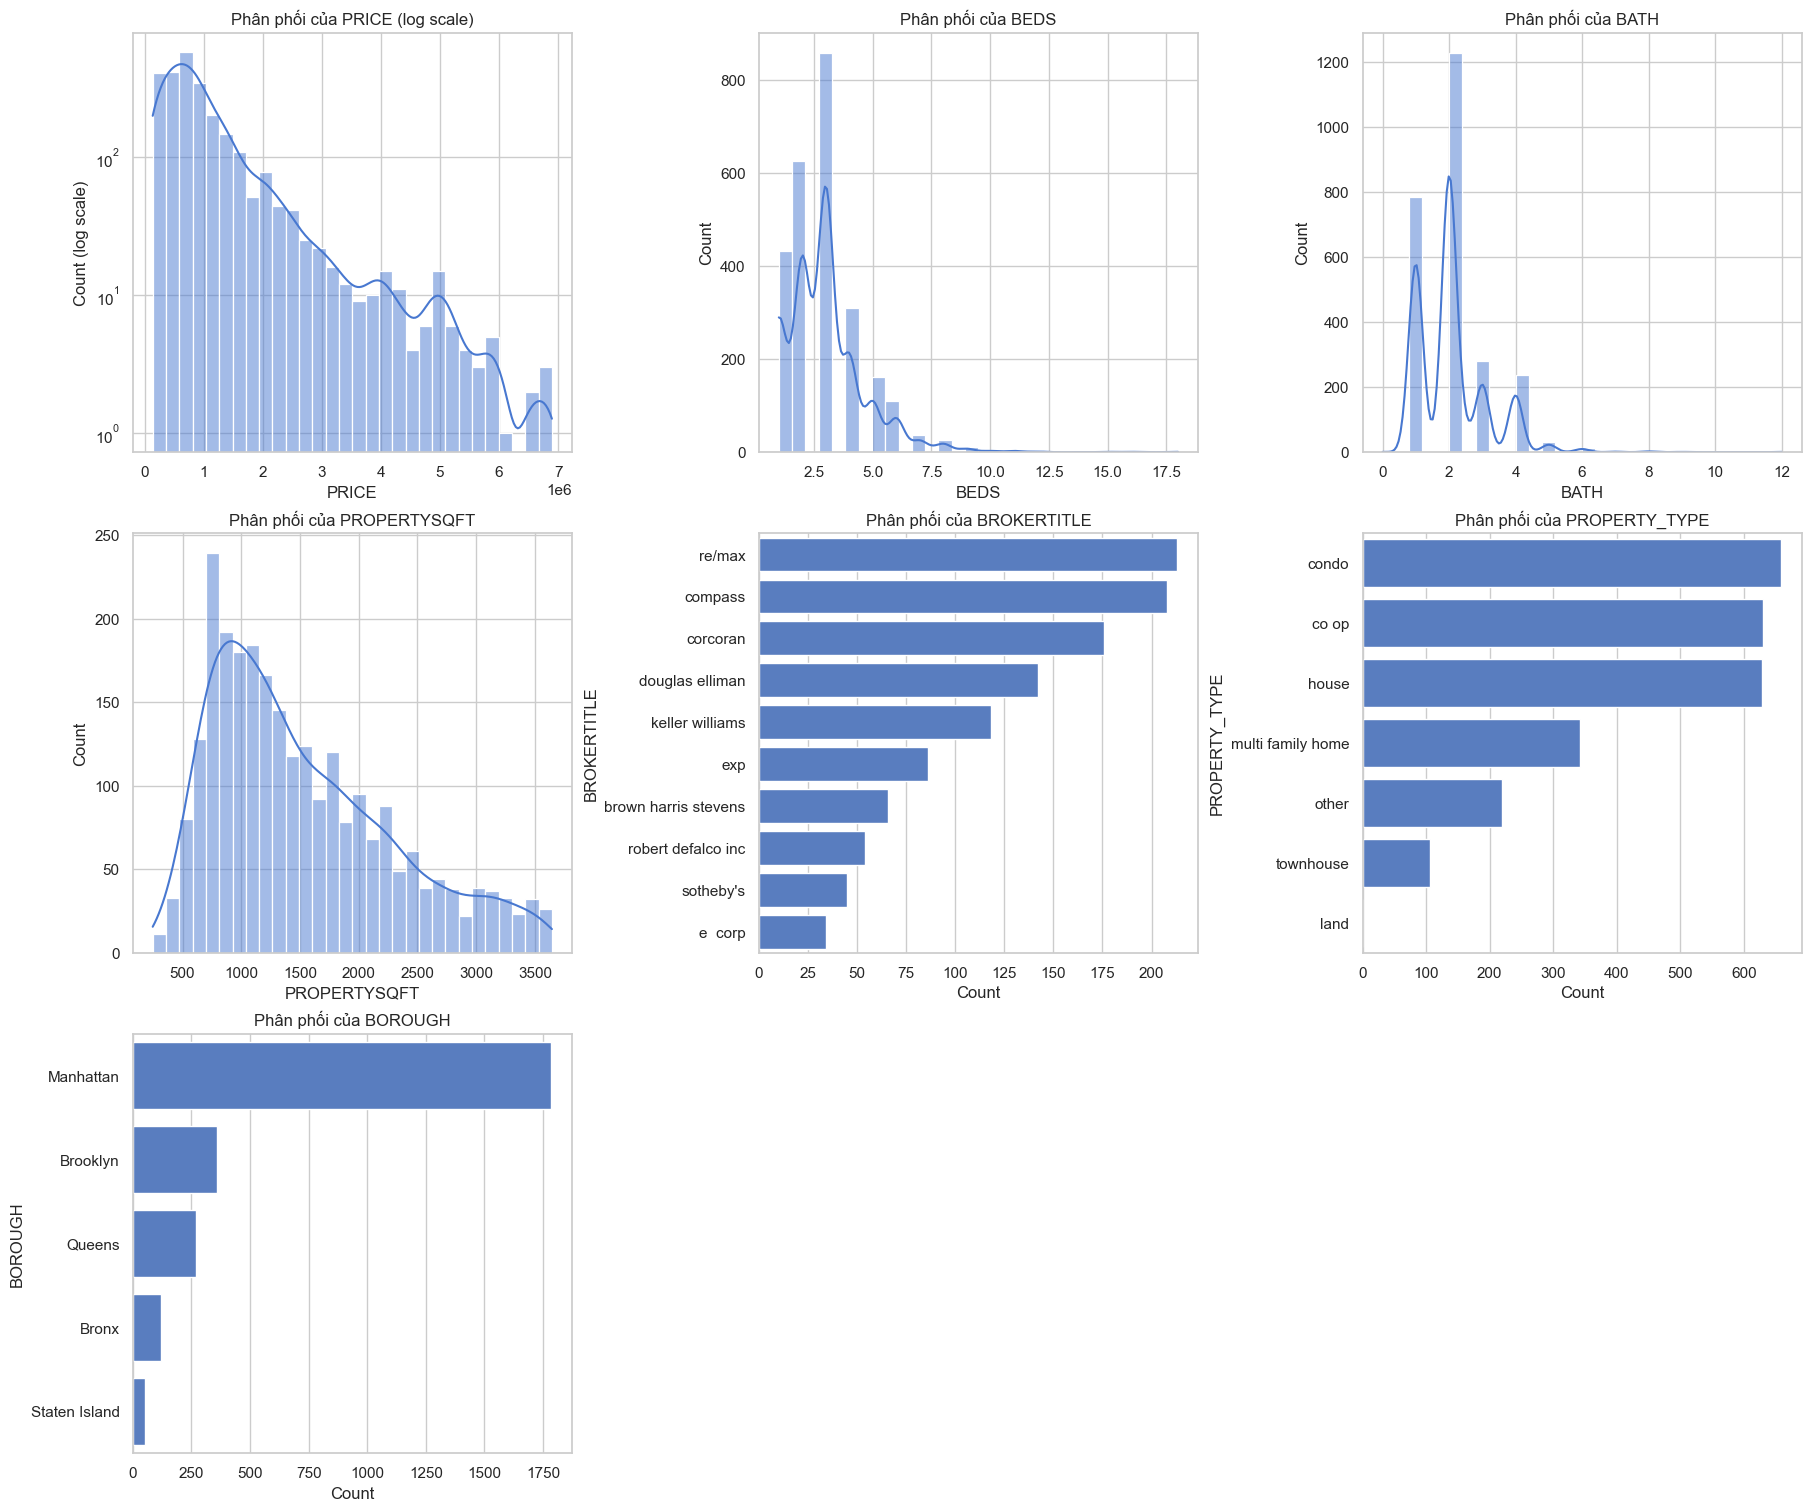

In [105]:
def plot_univariate_distribution(ax, df, column, plot_type='histogram'):
    if plot_type == 'histogram':
        sns.histplot(df[column], kde=True, bins=30, ax=ax)
        if column == 'PRICE':
            ax.set_yscale('log')  # Log scale cho PRICE
            ax.set_title(f'Phân phối của {column} (log scale)')
            ax.set_ylabel('Count (log scale)')
        else:
            ax.set_title(f'Phân phối của {column}')
            ax.set_ylabel('Count')
        ax.set_xlabel(column)
    elif plot_type == 'countplot':
        sns.countplot(y=df[column], order=df[column].value_counts().index[:10], ax=ax)
        ax.set_title(f'Phân phối của {column}')
        ax.set_xlabel('Count')
        ax.set_ylabel(column)

# Danh sách các cột
numerical_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
categorical_cols = ['BROKERTITLE', 'PROPERTY_TYPE', 'BOROUGH']
all_cols = numerical_cols + categorical_cols

# Vẽ biểu đồ theo lưới 3 cột
n_cols = 3  
n_rows = (len(all_cols) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()  

# Vẽ từng cột
for i, col in enumerate(all_cols):
    plot_type = 'histogram' if col in numerical_cols else 'countplot'
    plot_univariate_distribution(axes[i], df_normal, col, plot_type=plot_type)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


## 1. Phân phối giá nhà (PRICE)
- Giá nhà phân bố **lệch phải mạnh** (right-skewed).  
- Hai cụm giá chính xuất hiện:
  - **0.5M – 1M USD**: chiếm đa số.
  - **1.5M – 2M USD**: tạo thành cụm phụ, thường là căn hộ/townhouse ở Manhattan hoặc Brooklyn.  
- Giá trên 2.5M giảm dần nhưng vẫn có một số trường hợp cao đến gần 7M (vẫn nằm trong phân khúc Normal, chưa tính Luxury).  

## 2. Phân phối số phòng ngủ (BEDS)
- Phần lớn nhà có **2–3 phòng ngủ**, đúng với phân khúc đại chúng.  
- Số lượng nhà từ 5 phòng trở lên giảm mạnh, hiếm gặp.  

## 3. Phân phối số phòng tắm (BATH)
- Tương tự phòng ngủ, phổ biến nhất là **1–2 phòng tắm**.  
- Từ 4 phòng tắm trở lên rất ít → chủ yếu thuộc nhóm diện tích lớn, giá cao hơn.  

## 4. Phân phối diện tích (PROPERTYSQFT)
- Phổ biến trong khoảng **500 – 1500 sqft**, phù hợp hộ gia đình nhỏ/ trung bình.  
- Có một “đuôi dài” với diện tích >2000 sqft, thường nằm ở nhóm giá cao hơn.  

## 5. Phân phối theo môi giới (BROKERTITLE)
- Một số broker lớn chiếm ưu thế: **RE/MAX, Compass, Corcoran, Douglas Elliman, Keller Williams**.  
- Các broker này chi phối phần lớn nguồn cung trên thị trường.  

## 6. Phân phối theo loại nhà (PROPERTY_TYPE)
- Chủ yếu là **condo, co-op, house**.  
- Các loại townhouse, multi-family home, land chiếm tỷ lệ nhỏ hơn.  

## 7. Phân phối theo khu vực (BOROUGH)
- **Manhattan áp đảo** về số lượng listing.  
- Theo sau là **Brooklyn, Queens**, trong khi Bronx và Staten Island chỉ chiếm tỷ trọng nhỏ.  

---

### 🔑 Insight chính từ phân tích đơn biến
1. **Giá nhà phổ thông ở NYC chia làm hai cụm chính**: 0.5M–1M và 1.5M–2M.  
2. **2–3 phòng ngủ, 1–2 phòng tắm, diện tích 500–1500 sqft** là đặc trưng chung.  
3. **Condo và co-op** là loại hình chiếm ưu thế → phản ánh nhu cầu thị trường đô thị.  
4. **Manhattan là trung tâm** của thị trường Normal segment, cả về số lượng và giá trị.  
5. Thị trường bị chi phối mạnh bởi **một số broker lớn**.  



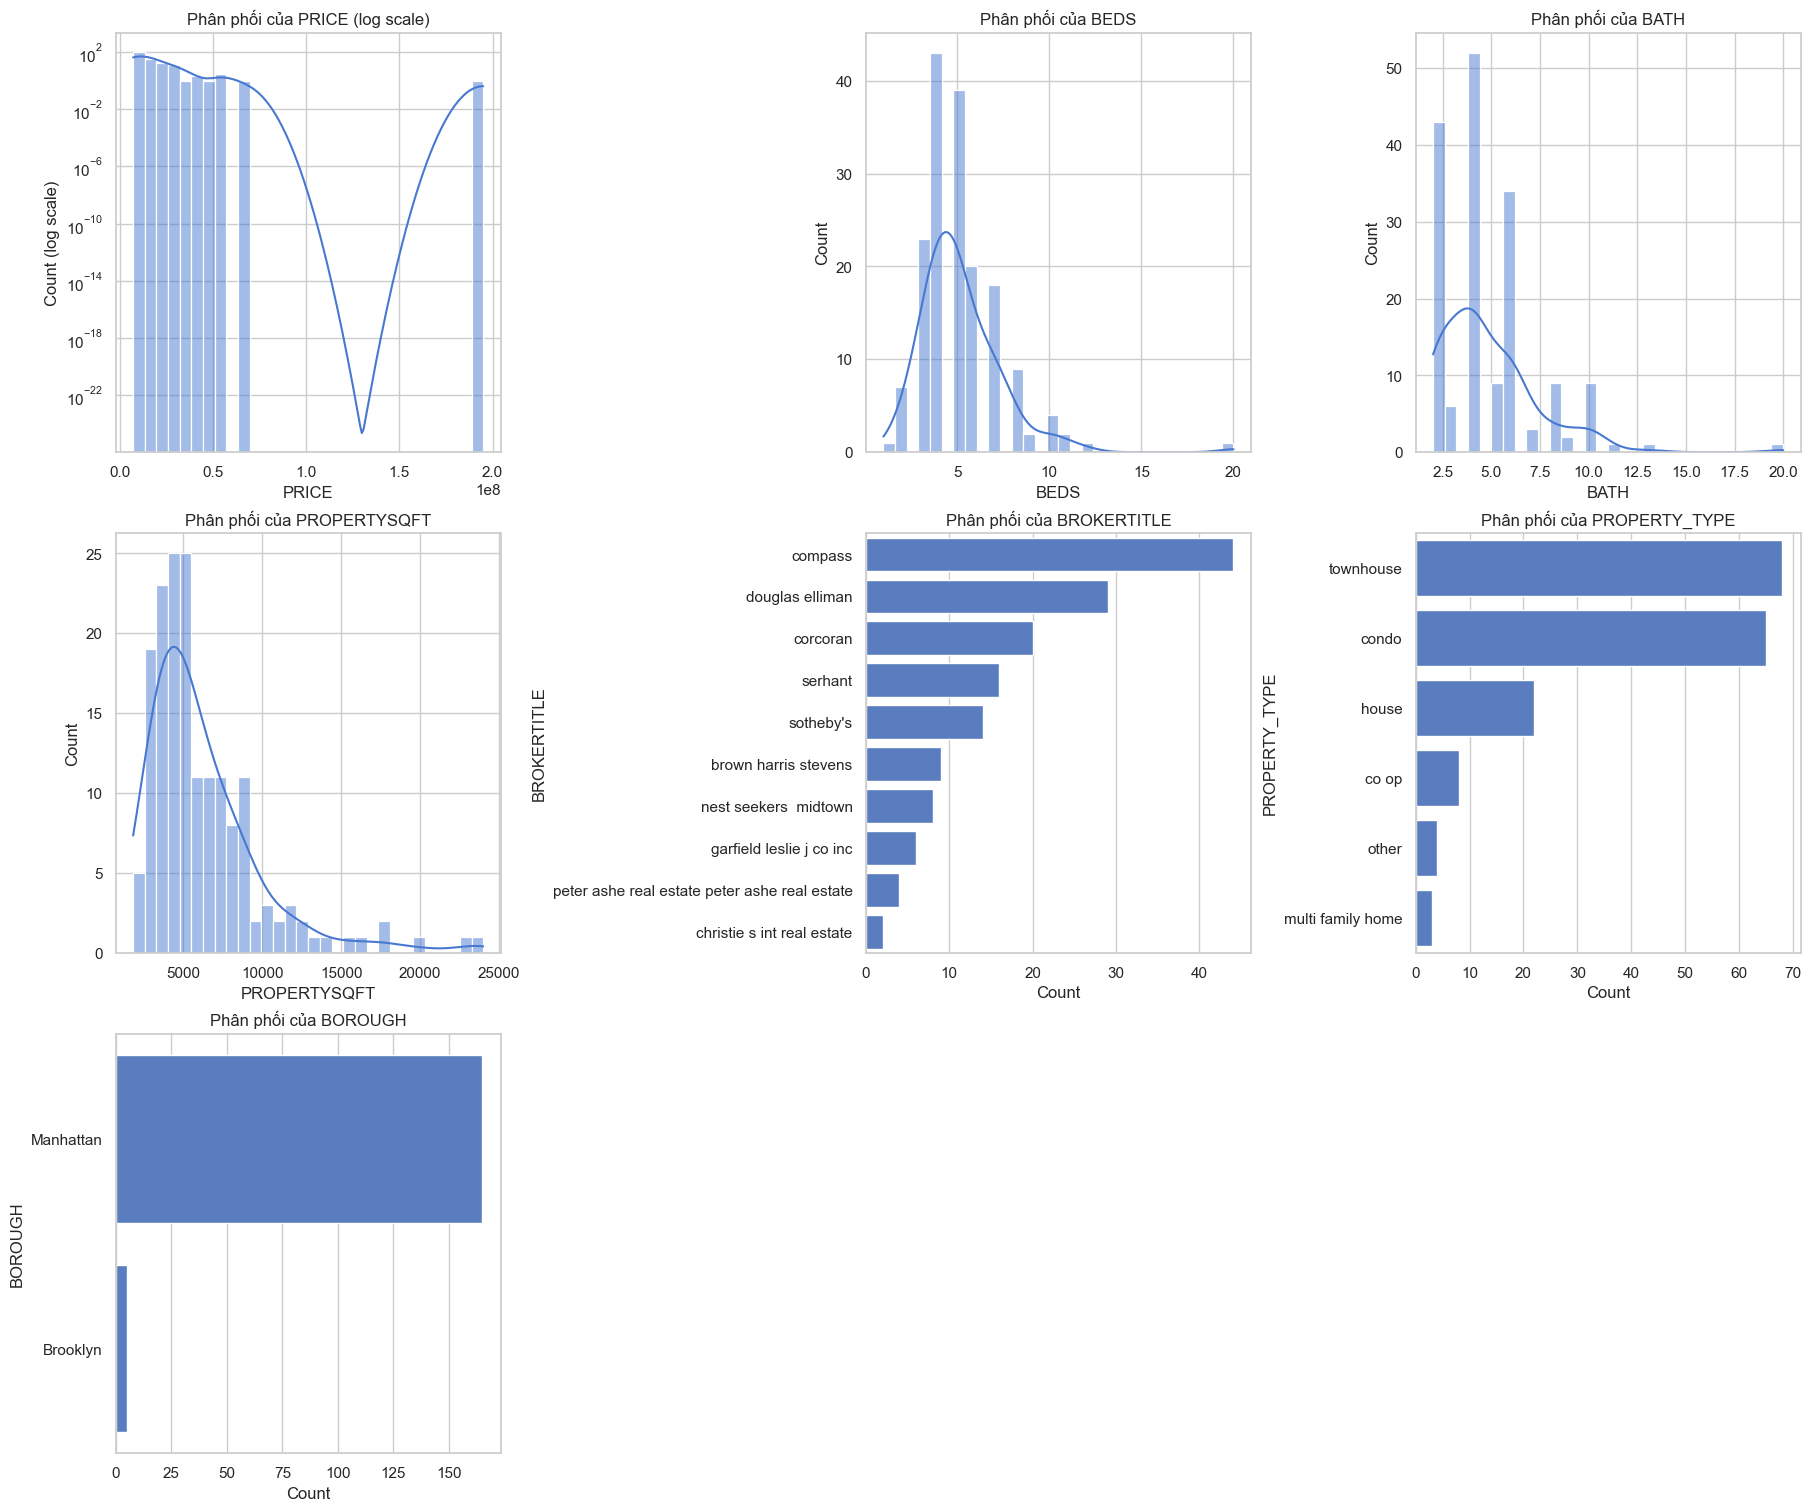

In [106]:
def plot_univariate_distribution(ax, df, column, plot_type='histogram'):
    if plot_type == 'histogram':
        sns.histplot(df[column], kde=True, bins=30, ax=ax)
        if column == 'PRICE':
            ax.set_yscale('log')  # Log scale cho PRICE
            ax.set_title(f'Phân phối của {column} (log scale)')
            ax.set_ylabel('Count (log scale)')
        else:
            ax.set_title(f'Phân phối của {column}')
            ax.set_ylabel('Count')
        ax.set_xlabel(column)
    elif plot_type == 'countplot':
        sns.countplot(y=df[column], order=df[column].value_counts().index[:10], ax=ax)
        ax.set_title(f'Phân phối của {column}')
        ax.set_xlabel('Count')
        ax.set_ylabel(column)

# Danh sách các cột
numerical_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
categorical_cols = ['BROKERTITLE', 'PROPERTY_TYPE', 'BOROUGH']
all_cols = numerical_cols + categorical_cols

# Vẽ biểu đồ theo lưới 3 cột
n_cols = 3  
n_rows = (len(all_cols) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()  

# Vẽ từng cột
for i, col in enumerate(all_cols):
    plot_type = 'histogram' if col in numerical_cols else 'countplot'
    plot_univariate_distribution(axes[i], df_luxury, col, plot_type=plot_type)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

### 1. Phân phối giá nhà (PRICE)
- Giá nhà luxury trải rộng từ **5M đến gần 200M USD**.  
- Phân phối lệch phải, nhưng khác với Normal, phần đuôi kéo dài tới hàng trăm triệu USD.  
- Xuất hiện rõ rệt một số **căn siêu sang (super luxury)** trên 50M, kéo trung bình giá lên cao.  

### 2. Phân phối số phòng ngủ (BEDS)
- Phổ biến từ **3–6 phòng ngủ**.  
- Xuất hiện một số căn biệt thự/townhouse có **10+ phòng ngủ**, hiếm nhưng đặc trưng cho phân khúc này.  

### 3. Phân phối số phòng tắm (BATH)
- Đa số có **3–6 phòng tắm**, đi kèm với số phòng ngủ lớn.  
- Một số ít trường hợp cực đoan có trên 10 phòng tắm → biệt thự hoặc căn hộ penthouse nhiều tầng.  

### 4. Phân phối diện tích (PROPERTYSQFT)
- Luxury chủ yếu từ **3,000 – 10,000 sqft**.  
- Một số căn cực lớn trên **20,000 sqft**, thường là biệt thự hoặc penthouse.  

### 5. Phân phối theo môi giới (BROKERTITLE)
- **Compass, Douglas Elliman, Corcoran** dẫn đầu số lượng listing luxury.  
- Các môi giới chuyên phân khúc cao cấp khác: **Serhant, Sotheby’s, Brown Harris Stevens**.  
- Thị trường luxury tập trung trong tay một số ít broker uy tín, mang tính chuyên biệt cao.  

### 6. Phân phối theo loại nhà (PROPERTY_TYPE)
- Luxury tập trung nhiều nhất vào **condo cao cấp và townhouse**.  
- House đơn lập và co-op có nhưng ít hơn.  
- Multi-family home hầu như không xuất hiện trong luxury.  

### 7. Phân phối theo khu vực (BOROUGH)
- **Manhattan áp đảo gần như tuyệt đối**, chỉ một phần rất nhỏ luxury ở Brooklyn.  
- Không có luxury ở Queens, Bronx hay Staten Island.  

---

#### 🔑 Insight chính từ phân tích đơn biến Luxury Segment
1. **Luxury ở NYC gần như đồng nghĩa với Manhattan**, nơi tập trung toàn bộ nguồn cung cao cấp.  
2. Giá dao động rộng, từ **5M – 200M USD**, với một số siêu phẩm kéo phân phối lên cực đoan.  
3. Đặc điểm căn hộ luxury: **diện tích lớn (3,000–10,000 sqft), nhiều phòng (3–6 phòng ngủ, 3–6 phòng tắm)**.  
4. Thị trường được chi phối bởi **một nhóm broker cao cấp**, nổi bật là Compass, Douglas Elliman, Corcoran, Serhant và Sotheby’s.  
5. **Condo & townhouse** là hình thức chính của luxury, phản ánh đặc thù đô thị Manhattan.  

➡️ Luxury segment tại NYC có tính tập trung cực cao về cả **địa lý (Manhattan)** lẫn **broker**. Đây là thị trường khác biệt hoàn toàn so với Normal segment, phục vụ nhóm khách hàng siêu giàu.


## 2.2. Multivariate Analysis

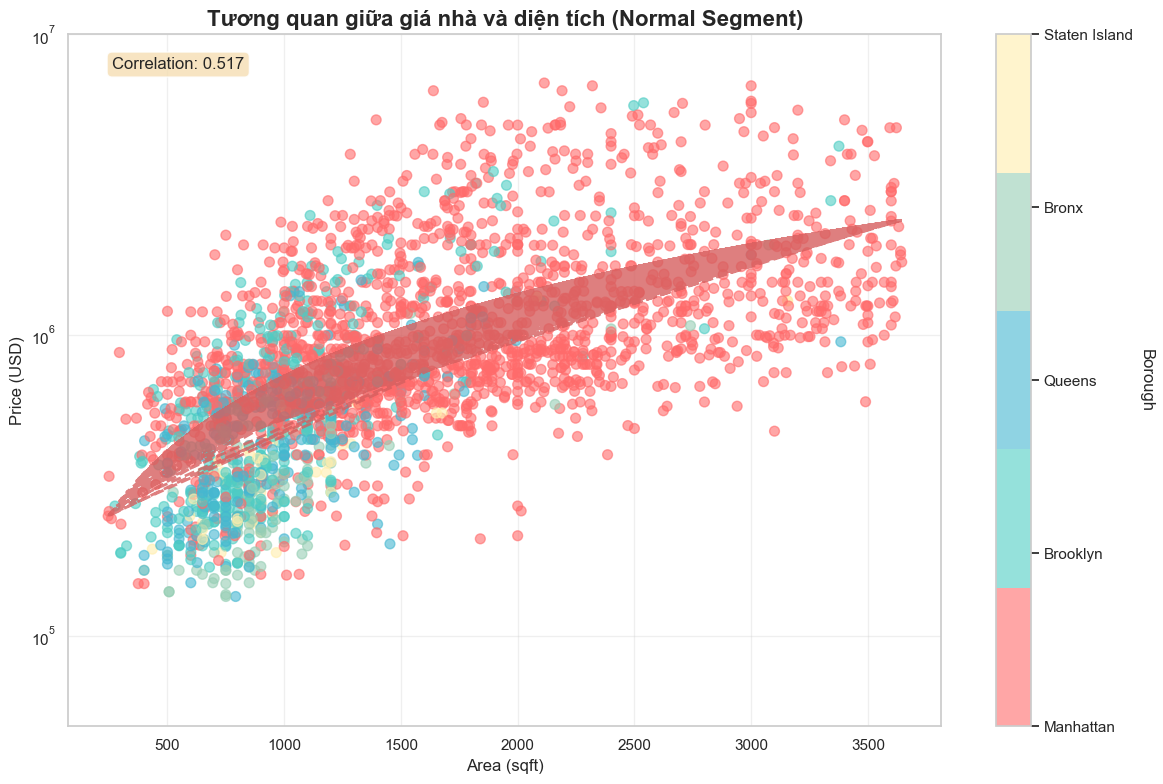

In [123]:
import matplotlib.colors  


# Nếu chỉ muốn Manhattan, lọc: df_normal = df_normal[df_normal['BOROUGH'] == 'Manhattan']

borough_mapping = {'Manhattan': 0, 'Brooklyn': 1, 'Queens': 2, 'Bronx': 3, 'Staten Island': 4}
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD']  # Màu cố định

df_normal['BOROUGH_CODE'] = df_normal['BOROUGH'].map(borough_mapping)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_normal['PROPERTYSQFT'], df_normal['PRICE'], alpha=0.6, 
                      c=df_normal['BOROUGH_CODE'], cmap=matplotlib.colors.ListedColormap(colors), s=50)

# Thêm đường xu hướng
z = np.polyfit(df_normal['PROPERTYSQFT'], df_normal['PRICE'], 1)
p = np.poly1d(z)
plt.plot(df_normal['PROPERTYSQFT'], p(df_normal['PROPERTYSQFT']), "r--", alpha=0.8, linewidth=2)

# Thêm hệ số tương quan
correlation = df_normal[['PROPERTYSQFT', 'PRICE']].corr().iloc[0, 1]
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes, 
         fontsize=12, bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

# Thêm colorbar với nhãn rời rạc
cbar = plt.colorbar(scatter, ticks=range(len(borough_mapping)))
cbar.set_ticklabels(list(borough_mapping.keys()))
cbar.set_label('Borough', rotation=270, labelpad=15)

plt.title('Tương quan giữa giá nhà và diện tích (Normal Segment)', fontsize=16, fontweight='bold')
plt.xlabel('Area (sqft)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.yscale('log')
plt.ylim(50000, 10000000)
plt.grid(True, alpha=0.3)
plt.tight_layout()  
plt.show()

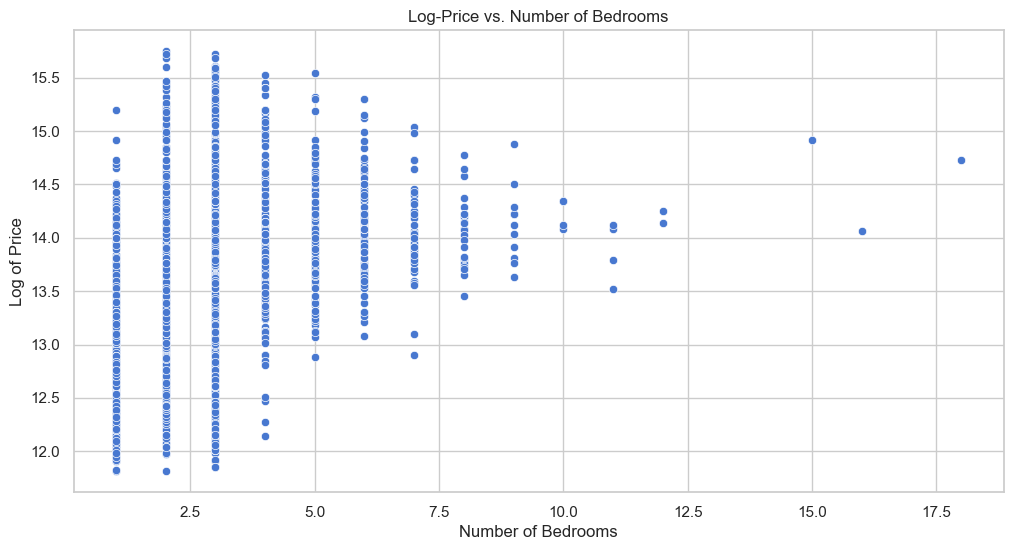

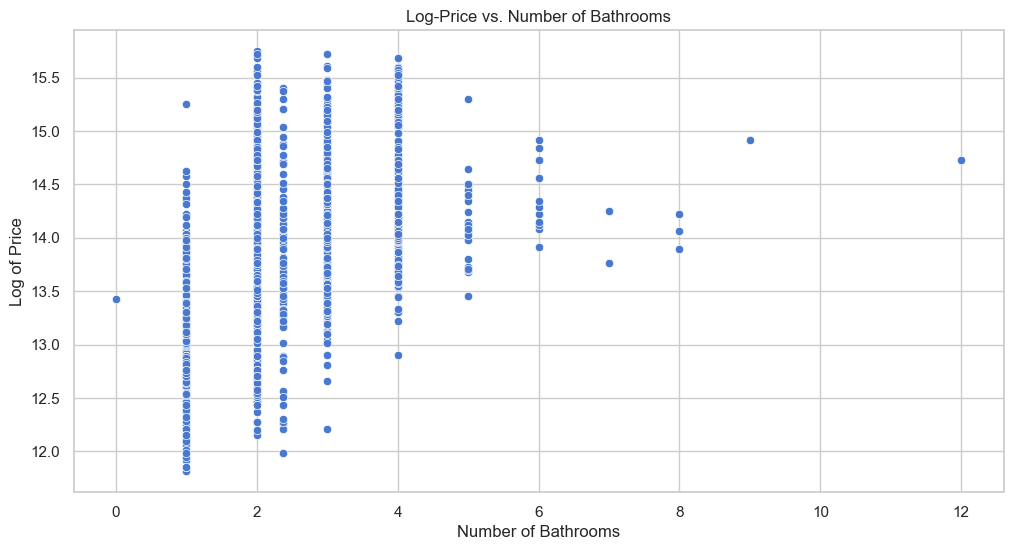

0.37518756743793713 0.5585689997119322


In [126]:
df_normal['LOG_PRICE'] = np.log(df_normal['PRICE'])

# Scatter plot for Bedrooms vs Log-transformed Price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='BEDS', y='LOG_PRICE', data=df_normal)
plt.title('Log-Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Log of Price')
plt.show()

# Scatter plot for Bathrooms vs Log-transformed Price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='BATH', y='LOG_PRICE', data=df_normal)
plt.title('Log-Price vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Log of Price')
plt.show()

# Calculating correlation coefficients with log-transformed price
beds_log_price_corr = df_normal['LOG_PRICE'].corr(df_normal['BEDS'])
bath_log_price_corr = df_normal['LOG_PRICE'].corr(df_normal['BATH'])

print(beds_log_price_corr, bath_log_price_corr)

In [ ]:
import plotly.express as px

fig1 = px.scatter(df_normal, x='BEDS', y='PRICE', 
                  trendline='ols', 
                  labels={'PRICE': 'Price', 'BEDS': 'Number of Bedrooms'},
                  title='Price vs. Number of Bedrooms')
fig1.show()

fig2 = px.scatter(df_normal, x='BATH', y='PRICE', 
                  trendline='ols', 
                  labels={'PRICE': 'Price', 'BATH': 'Number of Bathrooms'},
                  title='Price vs. Number of Bathrooms')
fig2.show()

Số phòng là yếu tố quan trọng nhưng không quyết định duy nhất giá nhà.

In [132]:

average_price_per_broker = df_normal.groupby('BROKERTITLE')['PRICE'].mean().sort_values(ascending=False)

total_listings_per_broker = df_normal['BROKERTITLE'].value_counts()

price_range_per_broker = df_normal.groupby('BROKERTITLE')['PRICE'].agg(['min', 'max', 'median']).sort_values(by='median', ascending=False)

# Displaying the results
print("Các nhà môi giới có giá niêm yết trung vị cao nhất:")
print(price_range_per_broker.head())

print("\nCác nhà môi giới có giá niêm yết trung bình cao nhất:")
print(average_price_per_broker.head())

print("\nCác nhà môi giới có nhiều niêm yết nhất:")
print(total_listings_per_broker.head())

Các nhà môi giới có giá niêm yết trung vị cao nhất:
                                  min      max     median
BROKERTITLE                                              
nest seekers  internationa    5999000  5999000  5999000.0
industrie rential             4895000  4895000  4895000.0
j shayovitz real estate corp  4750000  4750000  4750000.0
onekey mls realmart           4680000  4680000  4680000.0
harbor                        3895000  3895000  3895000.0

Các nhà môi giới có giá niêm yết trung bình cao nhất:
BROKERTITLE
nest seekers  internationa      5999000.0
industrie rential               4895000.0
j shayovitz real estate corp    4750000.0
onekey mls realmart             4680000.0
core  marketing                 3963333.0
Name: PRICE, dtype: float64

Các nhà môi giới có nhiều niêm yết nhất:
BROKERTITLE
re/max             213
compass            208
corcoran           176
douglas elliman    142
keller williams    118
Name: count, dtype: int64


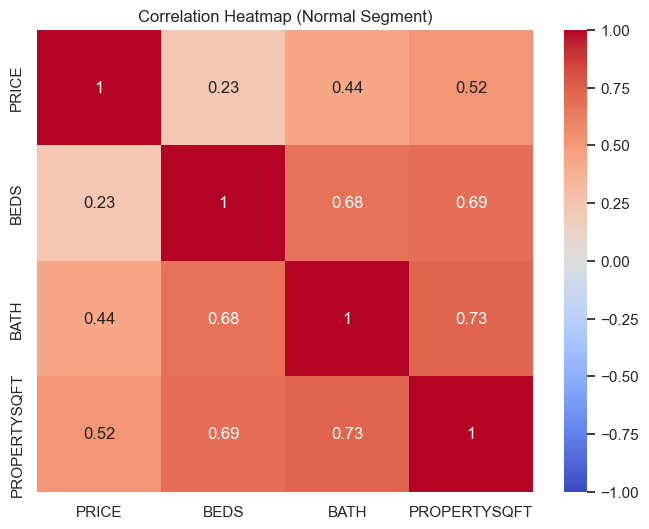

In [91]:
numeric_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
df_numeric = df_normal[numeric_cols].dropna()

# Tính ma trận tương quan
corr_matrix = df_numeric.corr()

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap (Normal Segment)')
plt.show()


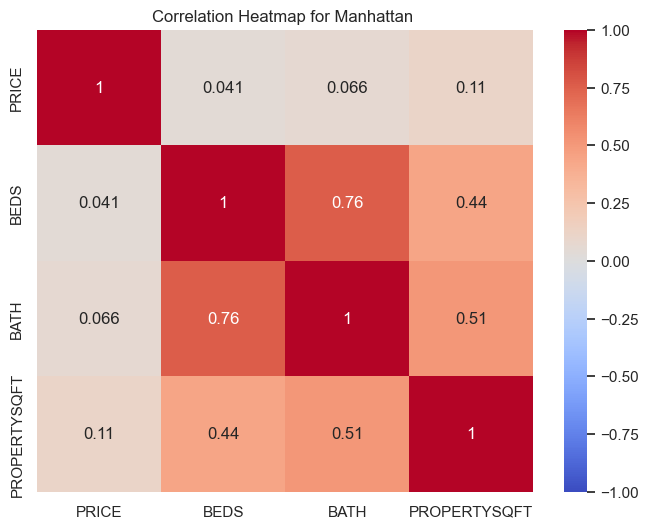

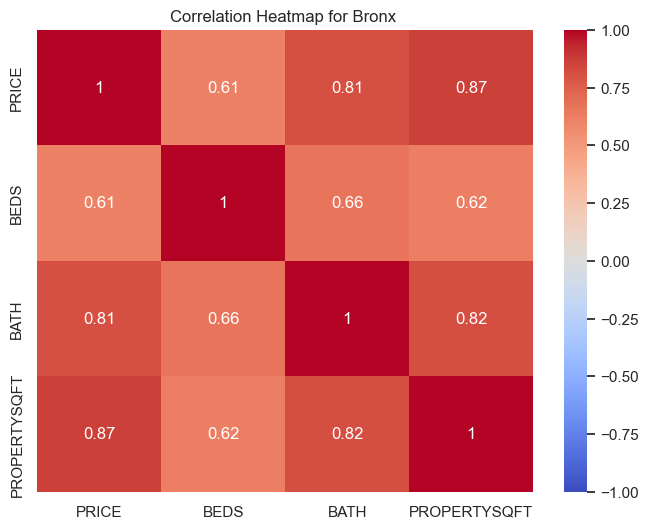

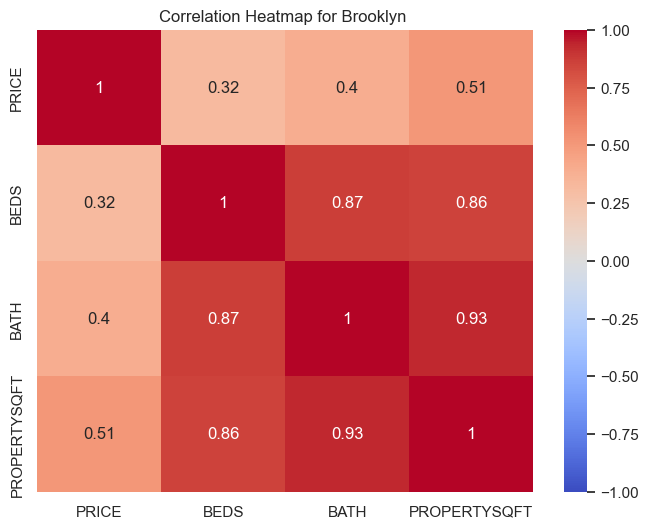

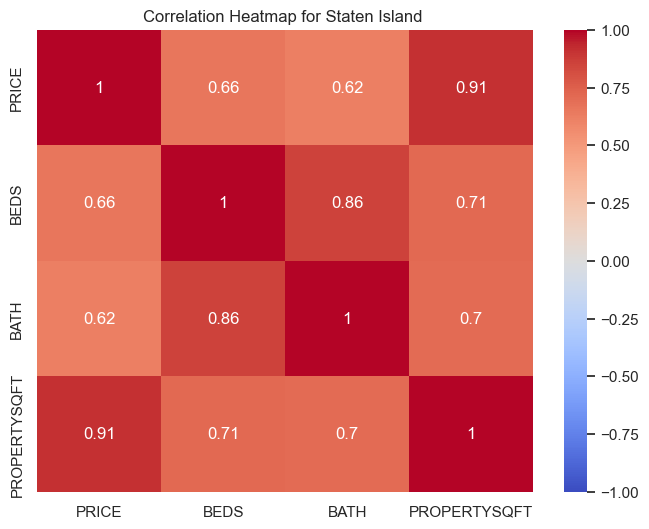

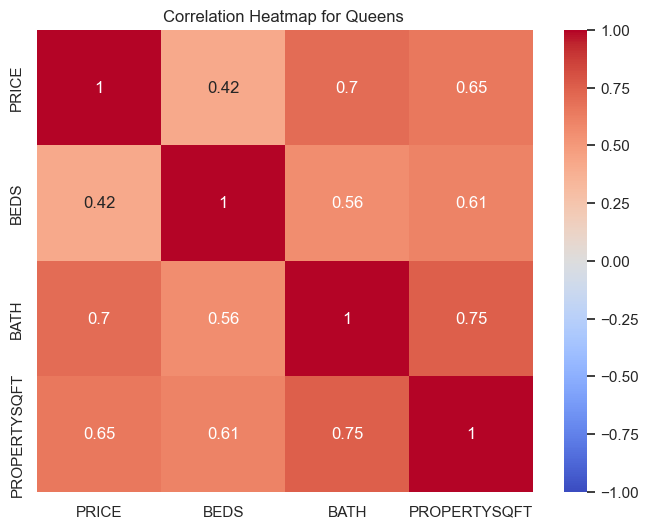

In [92]:
boroughs = df['BOROUGH'].unique()

# Vòng lặp qua từng quận để vẽ heatmap
for borough in boroughs:
    # Lọc dữ liệu theo quận
    df_borough = df[df['BOROUGH'] == borough]
    
    # Chọn các cột số
    numeric_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
    df_numeric = df_borough[numeric_cols].dropna()  # Loại bỏ giá trị NaN
    
    # Tính ma trận tương quan
    corr_matrix = df_numeric.corr()
    
    # Vẽ heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(f'Correlation Heatmap for {borough} ')
    plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(df_normal, 
                        lat="LATITUDE", 
                        lon="LONGITUDE", 
                        color="PRICE", 
                        size="PRICE",
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, 
                        zoom=10,
                        mapbox_style="carto-positron")

# Show the plot
fig.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12756\1325816498.py:4: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [134]:
df_normal['BROKERTITLE'] = df_normal['BROKERTITLE'].str.replace("Brokered by ", "")

top_brokers = df_normal['BROKERTITLE'].value_counts().nlargest(10).reset_index()
top_brokers.columns = ['BROKERTITLE', 'LISTINGS_COUNT']

fig = px.bar(top_brokers, x='BROKERTITLE', y='LISTINGS_COUNT',
             title=" Các nhà môi giới hàng đầu theo số lượng niêm yết",
             labels={'LISTINGS_COUNT': 'Number of Listings', 'BROKERTITLE': 'Broker'})
fig.show()

In [ ]:
top_10_brokers_list = top_brokers['BROKERTITLE'].tolist()
average_price_top_brokers = df_normal[df_normal['BROKERTITLE'].isin(top_10_brokers_list)].groupby('BROKERTITLE')['PRICE'].mean().reset_index()

fig = px.bar(average_price_top_brokers, x='BROKERTITLE', y='PRICE',
             title="Giá trung bình của các đơn vị được môi giới bởi 10 nhà môi giới hàng đầu    ",
             labels={'PRICE': 'Average Price', 'BROKERTITLE': 'Broker'})
fig.show()

In [ ]:
import plotly.express as px


broker_locality_counts = df_normal.groupby(['BROKERTITLE', 'BOROUGH']).size().reset_index(name='LISTINGS_COUNT')

broker_locality_counts_top_10 = broker_locality_counts[broker_locality_counts['BROKERTITLE'].isin(top_10_brokers_list)]

fig = px.bar(broker_locality_counts_top_10, x='BROKERTITLE', y='LISTINGS_COUNT', color='BOROUGH',
             title="Geographical Spread of Top 10 Brokers Across Different Localities",
             labels={'LISTINGS_COUNT': 'Number of Listings', 'BROKERTITLE': 'Broker', 'BOROUGH': 'Locality'})
fig.show()

In [97]:
# Filtering the dataset for the top 10 brokers
df_top_10_brokers = df_normal[df_normal['BROKERTITLE'].isin(top_10_brokers_list)]

# Creating a geospatial map
fig = px.scatter_mapbox(df_top_10_brokers, 
                        lat="LATITUDE", 
                        lon="LONGITUDE", 
                        color="BROKERTITLE", 
                        size="PRICE",
                        hover_data=['PRICE', 'BOROUGH'],
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, 
                        zoom=10,
                        mapbox_style="carto-positron",
                        title="Geographical Spread of Top 10 Brokers")

# Show the plot
fig.show()
# Analyzing property characteristics for the mentioned top 10 brokers


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12756\1672034819.py:5: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [136]:
df_top_10_brokers_properties = df_normal[df_normal['BROKERTITLE'].isin(top_10_brokers_list)]

broker_property_characteristics_top_10 = df_top_10_brokers_properties.groupby('BROKERTITLE').agg({
    'PROPERTYSQFT': 'mean',  
    'BEDS': 'mean',          
    'BATH': 'mean'          
}).reset_index()

# Displaying the results for the top 10 brokers
print(broker_property_characteristics_top_10)

            BROKERTITLE  PROPERTYSQFT      BEDS      BATH
0  brown harris stevens   1348.136364  2.500000  1.863636
1               compass   1538.625000  2.649038  2.054638
2              corcoran   1320.744318  2.272727  1.887054
3       douglas elliman   1521.056338  2.633803  2.044886
4               e  corp   1162.323529  3.264706  2.316109
5                   exp   1540.523256  3.395349  2.031950
6       keller williams   1517.627119  3.084746  1.997862
7                re/max   1609.948357  3.253521  2.197140
8    robert defalco inc   1827.833333  3.555556  2.398064
9             sotheby's   1754.177778  2.822222  2.261060
